In [1]:
# Importovanie knižníc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Načítanie dát

adresa = r"C:\Users\lucia\Data_Scientist\fotbal_prestupy_2000_2019.csv"
data = pd.read_csv(adresa)

data.head()


,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [3]:
# Názvy stĺpcov, datové typy, počet neprázdnych hodnôt atď.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jméno               4700 non-null   object 
 1   Pozice              4700 non-null   object 
 2   Věk                 4700 non-null   int64  
 3   Původní tým         4700 non-null   object 
 4   Původní liga        4700 non-null   object 
 5   Nový tým            4700 non-null   object 
 6   Nová  Liga          4700 non-null   object 
 7   Sezóna              4700 non-null   object 
 8   Odhadovaná hodnota  3440 non-null   float64
 9   Přestupová částka   4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [4]:
# Kontrola duplicít

duplicity=data[data.duplicated(keep=False)]
duplicity

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka


In [5]:
# Popisné štatistiky

pd.options.display.float_format = "{:.2f}".format
data.describe()

# reset nastavenia zobrazenia: pd.reset_option("display.float_format")

,Věk,Odhadovaná hodnota,Přestupová částka
count,4700.00,3440.00,4700.00
mean,24.34,8622469.48,9447586.17
std,3.23,8795180.75,10437719.32
min,0.00,50000.00,825000.00
25%,22.00,3500000.00,4000000.00
50%,24.00,6000000.00,6500000.00
75%,27.00,10000000.00,10820000.00
max,35.00,120000000.00,222000000.00


In [6]:
# Hráč/hráči s nulovým vekom

data.sort_values("Věk", ascending=True).head(10)

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000
1370,Fran Mérida,Central Midfield,15,Barcelona Yth.,Spain,Arsenal U18,England,2005-2006,NaN,3200000
945,Lee Martin,Attacking Midfield,16,MK Dons U18,England,Man Utd U18,England,2003-2004,NaN,1500000
4502,Willem Geubbels,Left Winger,16,Olympique Lyon,Ligue 1,Monaco,Ligue 1,2018-2019,6000000.00,20000000
1306,Slobodan Rajkovic,Centre-Back,16,OFK Beograd,SuperLiga,Chelsea,Premier League,2005-2006,NaN,5200000
1034,Anderson,Central Midfield,16,Grêmio,Brazil,FC Porto,Liga NOS,2004-2005,NaN,8000000
4273,Pietro Pellegri,Centre-Forward,16,Genoa,Serie A,Monaco,Ligue 1,2017-2018,8000000.00,21000000
841,Cesc Fàbregas,Central Midfield,16,Barça Juvenil A,Spain,Arsenal,Premier League,2003-2004,NaN,3200000
2223,Philippe Coutinho,Attacking Midfield,16,Vasco U17,Brazil,Inter,Serie A,2008-2009,2500000.00,3800000
1254,Theo Walcott,Right Winger,16,Southampton,Championship,Arsenal,Premier League,2005-2006,2500000.00,10500000


In [7]:
# Odstránenie jedného hráča s nulovým vekom

data = data[data["Věk"] != 0]

In [8]:
# Kontrola min. veku po odstránení nuly

data["Věk"].min()

15

In [9]:
# Unikátne pozície v datasete, na ktorých hráč môže hrať

pozice = data["Pozice"].unique()

print(pozice)
len(pozice)



['Right Winger' 'Centre-Forward' 'Left Winger' 'Centre-Back'
 'Central Midfield' 'Attacking Midfield' 'Defensive Midfield'
 'Second Striker' 'Goalkeeper' 'Right-Back' 'Left Midfield' 'Left-Back'
 'Right Midfield' 'Forward' 'Sweeper' 'Defender' 'Midfielder']


17

In [10]:
# Na akých pozíciách hrajú hráči, ktorí najčastejšie prestupujú

data["Pozice"].value_counts()

Pozice
Centre-Forward        1217
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Sweeper                  1
Defender                 1
Midfielder               1
Name: count, dtype: int64

In [11]:
# Priemerné prestupové ceny podľa pozícií
priemerne_ceny_pozicie = data.groupby('Pozice')['Přestupová částka'].mean()
print("\nPriemerné prestupové ceny podľa pozícií:")
# print(priemerne_ceny_pozicie)


priemerne_ceny_pozicie.sort_values(ascending=False)


Priemerné prestupové ceny podľa pozícií:


Pozice
Left Winger          12904644.19
Right Winger         11930360.66
Central Midfield     10096242.30
Attacking Midfield    9824178.40
Centre-Forward        9596507.81
Defensive Midfield    8992019.46
Second Striker        8790153.85
Centre-Back           8448592.44
Right-Back            8254309.39
Left-Back             7718933.33
Goalkeeper            7622666.67
Right Midfield        7404126.98
Left Midfield         6717126.44
Sweeper               2250000.00
Forward               2200000.00
Defender              2000000.00
Midfielder            1130000.00
Name: Přestupová částka, dtype: float64

In [12]:
# Mediánové prestupové ceny podľa pozícií
medianove_ceny_pozicie = data.groupby('Pozice')['Přestupová částka'].median()
print("\nPriemerné prestupové ceny podľa pozícií:")
#print(medianove_ceny_pozicie)

medianove_ceny_pozicie.sort_values(ascending=False)




Priemerné prestupové ceny podľa pozícií:


Pozice
Left Winger          8200000.00
Right Winger         7500000.00
Central Midfield     7000000.00
Attacking Midfield   6950000.00
Defensive Midfield   6900000.00
Centre-Forward       6800000.00
Centre-Back          6000000.00
Second Striker       6000000.00
Right-Back           5900000.00
Goalkeeper           5500000.00
Left-Back            5500000.00
Left Midfield        4700000.00
Right Midfield       4500000.00
Sweeper              2250000.00
Forward              2000000.00
Defender             2000000.00
Midfielder           1130000.00
Name: Přestupová částka, dtype: float64

In [13]:
# Kto najčastejšie prestupoval

data["Jméno"].value_counts()

Jméno
Alex                   8
Peter Crouch           7
Fernando               7
Paulinho               6
Carlos Tévez           6
                      ..
Fábio Simplício        1
Celsinho               1
Ricardo Rocha          1
Benoît Assou-Ekotto    1
Kyle Bartley           1
Name: count, Length: 3103, dtype: int64

In [14]:
# Filtrácia dát pre hráča Alex

alex_data = data[data["Jméno"] == "Alex"] 
alex_sum = alex_data["Přestupová částka"].sum() 

# Filtrácia dát pre hráča Neymar 
neymar_data = data[data["Jméno"] == "Neymar"] 
neymar_sum = neymar_data["Přestupová částka"].sum()

print(f"Súčet prestupových čiastok pre Alex: {alex_sum}") 
print(f"Súčet prestupových čiastok pre Neymar: {neymar_sum}")

Súčet prestupových čiastok pre Alex: 51500000
Súčet prestupových čiastok pre Neymar: 310200000


In [15]:
# Top 10 najdrahších hráčov

data.sort_values("Přestupová částka", ascending=False).head(10)

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.00,222000000
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.00,135000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.00,125000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.00,117000000
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.00,115000000
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.00,105000000
3217,Gareth Bale,Right Winger,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.00,101000000
2226,Cristiano Ronaldo,Centre-Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.00,94000000
3962,Gonzalo Higuaín,Centre-Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.00,90000000
3218,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.00,88200000


In [16]:
# V ktorých ligách sa najviac nakupovalo, v názve stĺpca je medzera naviac, premenovanie stĺpca

data.rename( columns={ "Nová  Liga": "Nová liga", }, inplace=True, )

In [17]:
# Top 10 líg podľa najvyššieho počtu prestupov

top_10_lig = data["Nová liga"].value_counts().head(10)
top_10_lig

Nová liga
Premier League    1256
Serie A            739
LaLiga             525
1.Bundesliga       422
Ligue 1            397
Premier Liga       328
Süper Lig          143
Liga NOS           127
Super League       122
Eredivisie         108
Name: count, dtype: int64

In [18]:
# Top 10 klubov podľa najvyššieho počtu prestupov

top_10_prestupy = data["Nový tým"].value_counts().head(10)
top_10_prestupy

Nový tým
Inter              97
Chelsea            96
Man City           94
Spurs              93
Juventus           87
Liverpool          85
AS Roma            77
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
Name: count, dtype: int64

In [19]:
# Top 10 klubov podľa prestupovej čiastky

bohate_kluby = data.groupby('Nový tým')['Přestupová částka'].sum()


# Zoradenie klubov podľa celkovej zaplatenej sumy v zostupnom poradí a výber top 10 
top_10_klubov = bohate_kluby.sort_values(ascending=False).head(10) 
# Zobrazenie výsledku 
print(top_10_klubov)

Nový tým
Chelsea         1820650000
Man City        1800520000
Real Madrid     1680650000
FC Barcelona    1673040000
Man Utd         1497360000
Juventus        1470940000
Liverpool       1412420000
Paris SG        1274780000
Inter           1202690000
Spurs           1024400000
Name: Přestupová částka, dtype: int64


In [20]:
# Počet prestupov za sezónu

prestupy_sezona = data['Sezóna'].value_counts()
print("\nPočet prestupov za sezónu:")
print(prestupy_sezona)

prestupy_sezona.describe()


Počet prestupov za sezónu:
Sezóna
2016-2017    250
2013-2014    250
2008-2009    250
2001-2002    250
2009-2010    249
2011-2012    249
2006-2007    249
2015-2016    248
2004-2005    248
2007-2008    248
2012-2013    248
2000-2001    247
2005-2006    247
2014-2015    246
2010-2011    245
2018-2019    245
2002-2003    244
2017-2018    244
2003-2004    242
Name: count, dtype: int64


count    19.00
mean    247.32
std       2.38
min     242.00
25%     245.50
50%     248.00
75%     249.00
max     250.00
Name: count, dtype: float64

In [21]:
# Rozdiel medzi odhadovanou a skutočnou cenou prestupu
# Nahradím chýbajúce hodnoty mediánom Odhadovanej hodnoty

median_value = data['Odhadovaná hodnota'].median() 
data['Odhadovaná hodnota'].fillna(median_value, inplace=True)

In [22]:
# Rozdiel medzi odhadovanou a skutočnou cenou prestupu po nahradení null hodnôt

data['Rozdíl cen'] = data['Přestupová částka'] - data['Odhadovaná hodnota']
print("\nRozdiel medzi odhadovanou a skutočnou cenou prestupu:")
print(data[['Jméno', 'Rozdíl cen']])


Rozdiel medzi odhadovanou a skutočnou cenou prestupu:
                  Jméno  Rozdíl cen
0             Luís Figo 54000000.00
1         Hernán Crespo 50810000.00
2         Marc Overmars 34000000.00
3     Gabriel Batistuta 30150000.00
4        Nicolas Anelka 28500000.00
...                 ...         ...
4695      Jasmin Kurtic  -200000.00
4696          Tchê Tchê  1800000.00
4697      Silvan Widmer -4000000.00
4698         Yuya Osako        0.00
4699       Kyle Bartley  1000000.00

[4699 rows x 2 columns]


In [23]:
# Nadhodnotené prestupy

data.sort_values("Rozdíl cen", ascending=True).head(5)



,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová liga,Sezóna,Odhadovaná hodnota,Přestupová částka,Rozdíl cen
2717,Ronaldinho,Attacking Midfield,30,AC Milan,Serie A,Flamengo,Série A,2010-2011,27500000.00,3000000,-24500000.00
1737,Thierry Henry,Centre-Forward,29,Arsenal,Premier League,FC Barcelona,LaLiga,2007-2008,45000000.00,24000000,-21000000.00
1532,Ronaldo,Centre-Forward,30,Real Madrid,LaLiga,AC Milan,Serie A,2006-2007,27500000.00,7500000,-20000000.00
2723,Cesc Fàbregas,Central Midfield,24,Arsenal,Premier League,FC Barcelona,LaLiga,2011-2012,54000000.00,34000000,-20000000.00
4668,Bryan Cristante,Central Midfield,23,Benfica,Liga NOS,Atalanta,Serie A,2018-2019,25000000.00,5000000,-20000000.00


In [24]:
# Podhodnotené prestupy

data.sort_values("Rozdíl cen", ascending=False).head(5)


,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová liga,Sezóna,Odhadovaná hodnota,Přestupová částka,Rozdíl cen
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.00,222000000,122000000.00
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.00,115000000,82000000.00
248,Zinédine Zidane,Attacking Midfield,29,Juventus,Serie A,Real Madrid,LaLiga,2001-2002,6000000.00,77500000,71500000.00
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,6000000.00,60000000,54000000.00
3716,Anthony Martial,Left Winger,19,Monaco,Ligue 1,Man Utd,Premier League,2015-2016,8000000.00,60000000,52000000.00


In [25]:
# Korelácia medzi odhadovanou a skutočnou cenou prestupu

korelacia = data[['Odhadovaná hodnota', 'Přestupová částka']].corr()
print("\nKorelácia medzi odhadovanou a skutočnou cenou prestupu:")
print(korelacia)



Korelácia medzi odhadovanou a skutočnou cenou prestupu:
                    Odhadovaná hodnota  Přestupová částka
Odhadovaná hodnota                1.00               0.78
Přestupová částka                 0.78               1.00


Vizualizácie

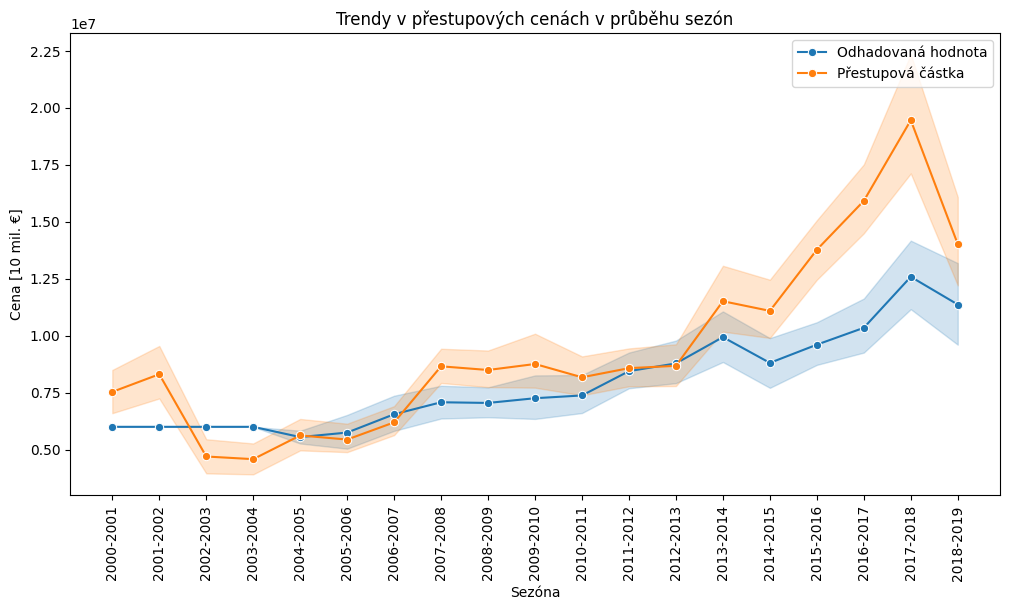

In [26]:
# Trendy v prestupových cenách v priebehu sezón

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data, x='Sezóna', y='Odhadovaná hodnota', marker='o', label='Odhadovaná hodnota')
sns.lineplot(data=data, x='Sezóna', y='Přestupová částka', marker='o', label='Přestupová částka')
plt.legend()
ax.set(title='Trendy v přestupových cenách v průběhu sezón', xlabel='Sezóna', ylabel='Cena [10 mil. €]') 
ax.tick_params(axis="x",rotation=90)




[Text(0.5, 1.0, 'Porovnání přestupových cen mezi kluby'),
 Text(0.5, 0, 'Klub'),
 Text(0, 0.5, 'Cena [10 mil. €]')]

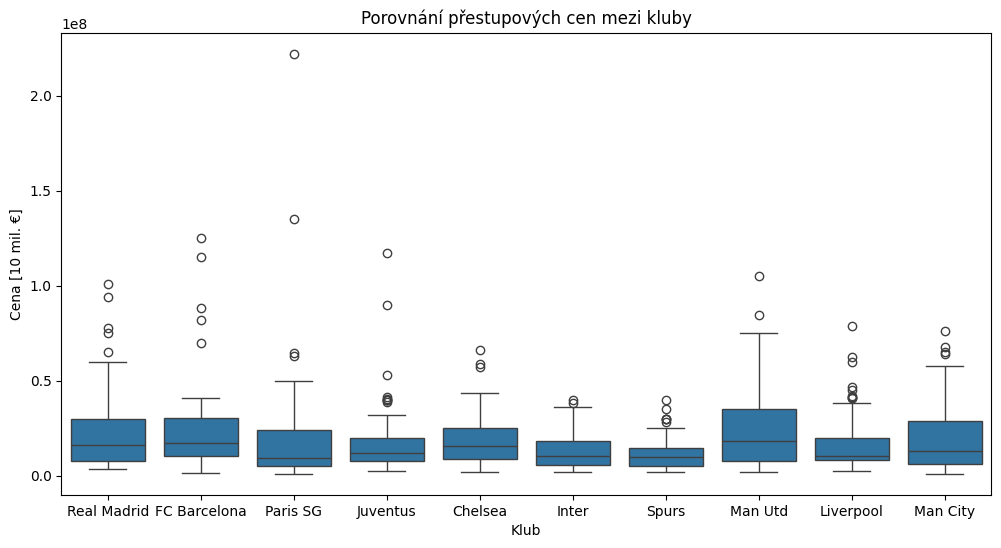

In [27]:
# Porovnanie prestupových cien medzi top 10 klubmi, ktoré najviac platili

top_kluby = [
"Chelsea",         
"Man City",        
"Real Madrid",    
"FC Barcelona",    
"Man Utd",        
"Juventus",        
"Liverpool",       
"Paris SG",       
"Inter",
"Spurs",
]

top_kluby_data = data[data["Nový tým"].isin(top_kluby)]

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=top_kluby_data, x='Nový tým', y='Přestupová částka')
ax.set(title='Porovnání přestupových cen mezi kluby', xlabel='Klub', ylabel='Cena [10 mil. €]') 




[Text(0.5, 1.0, 'Rozdělení hráčů podle věku'),
 Text(0.5, 0, 'Věk hráče'),
 Text(0, 0.5, 'Počet hráčů')]

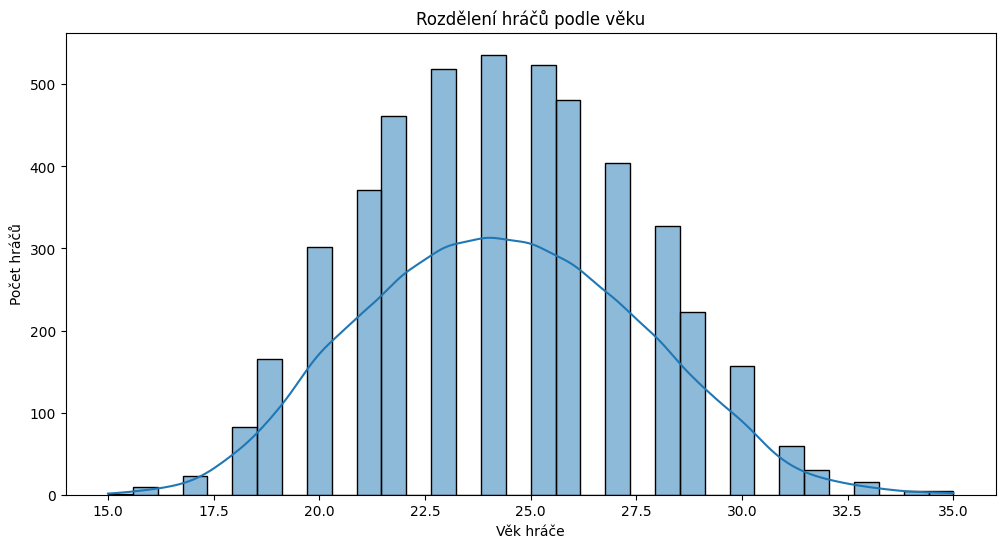

In [28]:
# Rozdelenie hráčov podľa veku

plt.figure(figsize=(12, 6))
ax = sns.histplot(data['Věk'], kde=True)
ax.set(title='Rozdělení hráčů podle věku',xlabel='Věk hráče', ylabel='Počet hráčů')


[Text(0.5, 1.0, 'Průměrná přestupová hodnota podle věkových skupin'),
 Text(0.5, 0, 'Věk'),
 Text(0, 0.5, 'Průměrná přestupová hodnota [10 mil. €]')]

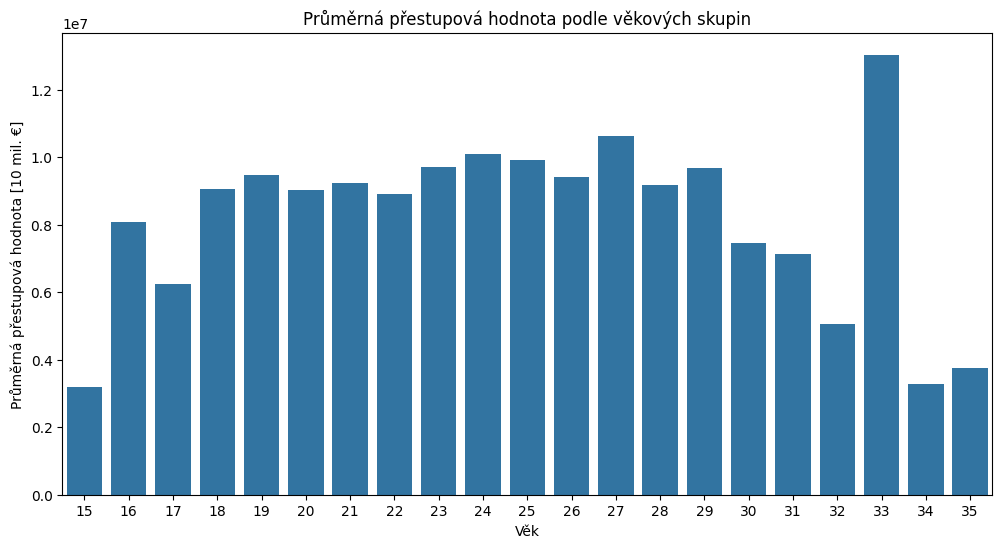

In [29]:
# Prestupové sumy podľa vekových skupín

age_groups = data.groupby("Věk")["Přestupová částka"].mean().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=age_groups, x="Věk", y="Přestupová částka")
ax.set(title="Průměrná přestupová hodnota podle věkových skupin", xlabel="Věk", ylabel="Průměrná přestupová hodnota [10 mil. €]")

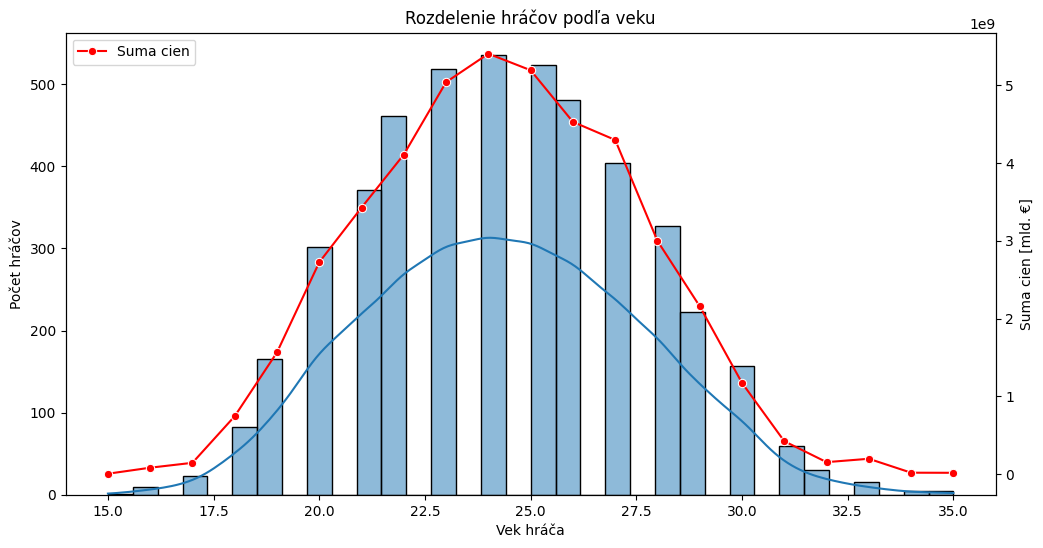

In [30]:
plt.figure(figsize=(12, 6)) 
ax1 = sns.histplot(data['Věk'], kde=True) 
ax1.set(title='Rozdelenie hráčov podľa veku', xlabel='Vek hráča', ylabel='Počet hráčov') 
# Vytvorenie sekundárnej osi y pre sumu cien 
ax2 = ax1.twinx() 
# Vypočítanie súčtu cien pre každý vek 
age_price_sum = data.groupby('Věk')['Přestupová částka'].sum().reset_index() # Čiarový graf súčtu cien podľa veku 
sns.lineplot(data=age_price_sum, x='Věk', y='Přestupová částka', ax=ax2, color='r', marker='o', label='Suma cien') 
ax2.set_ylabel('Suma cien [mld. €]') 
ax2.legend(loc='upper left')